<a href="https://colab.research.google.com/github/KW-ML/ML_Project/blob/main/code/ada%26xg%2Bshap_Smogn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/기계학습팀플/코드/data/smogn.csv',encoding='cp949')
#data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 COD,...,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타,처리효율
0,46,46,0,27.500000,27.500000,0.000000,27.500000,27.500000,0.000000,20.400000,...,1,0,0,8073,8073,1,1,1,1,87.400000
1,35,35,0,21.500000,21.500000,0.000000,21.500000,21.500000,0.000000,41.600000,...,1,0,0,8053,8053,1,1,1,1,90.000000
2,40,0,40,35.900000,0.000000,35.900000,36.700000,0.000000,36.700000,72.400000,...,1,0,0,5482,5482,1,1,1,1,89.200000
3,36,0,36,30.100000,0.000000,30.100000,28.400000,0.000000,28.400000,74.000000,...,1,0,1,5946,5946,1,1,1,1,87.900000
4,45,0,45,15.600000,0.000000,15.600000,15.600000,0.000000,15.600000,41.800000,...,0,1,0,5481,5481,1,1,1,1,83.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,30,0,30,27.948904,0.000000,27.948904,27.948904,0.000000,27.948904,90.305735,...,0,0,0,8562,8562,1,1,1,1,95.782359
5198,274,0,274,195.250777,0.000000,195.250777,194.929308,0.000000,194.929308,127.651905,...,0,1,0,622,569,1,1,1,1,98.399593
5199,87,0,87,41.784180,0.000000,41.784180,41.784180,0.000000,41.784180,108.227847,...,0,1,0,5866,5866,1,1,1,1,92.625699
5200,44,0,44,43.911212,0.000000,43.911212,43.869036,0.000000,43.869036,18.313310,...,0,0,0,3382,3380,1,1,1,1,86.452759


In [ ]:
df = data.copy()

In [ ]:
#X = df.drop(['처리효율','방류 BOD','유입 BOD'],axis = 1)
X = df.drop(['처리효율'],axis = 1)

In [ ]:
X

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 COD,...,지역구분_2,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타
0,46,46,0,27.500000,27.500000,0.000000,27.500000,27.500000,0.000000,20.400000,...,1,1,0,0,8073,8073,1,1,1,1
1,35,35,0,21.500000,21.500000,0.000000,21.500000,21.500000,0.000000,41.600000,...,1,1,0,0,8053,8053,1,1,1,1
2,40,0,40,35.900000,0.000000,35.900000,36.700000,0.000000,36.700000,72.400000,...,1,1,0,0,5482,5482,1,1,1,1
3,36,0,36,30.100000,0.000000,30.100000,28.400000,0.000000,28.400000,74.000000,...,1,1,0,1,5946,5946,1,1,1,1
4,45,0,45,15.600000,0.000000,15.600000,15.600000,0.000000,15.600000,41.800000,...,1,0,1,0,5481,5481,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,30,0,30,27.948904,0.000000,27.948904,27.948904,0.000000,27.948904,90.305735,...,1,0,0,0,8562,8562,1,1,1,1
5198,274,0,274,195.250777,0.000000,195.250777,194.929308,0.000000,194.929308,127.651905,...,0,0,1,0,622,569,1,1,1,1
5199,87,0,87,41.784180,0.000000,41.784180,41.784180,0.000000,41.784180,108.227847,...,0,0,1,0,5866,5866,1,1,1,1
5200,44,0,44,43.911212,0.000000,43.911212,43.869036,0.000000,43.869036,18.313310,...,1,0,0,0,3382,3380,1,1,1,1


In [ ]:
Y = df['처리효율']
Y

0       87.400000
1       90.000000
2       89.200000
3       87.900000
4       83.800000
          ...    
5197    95.782359
5198    98.399593
5199    92.625699
5200    86.452759
5201    94.999053
Name: 처리효율, Length: 5202, dtype: float64

In [ ]:
train_low = pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/train_low.csv", encoding = 'utf-8-sig')
test_low =pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/test_low.csv", encoding = 'utf-8-sig')
train_high= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/train_high.csv", encoding = 'utf-8-sig')
test_high= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/test_high.csv", encoding = 'utf-8-sig')

In [ ]:
dfTrain = pd.concat([train_low,train_high])
dfTest = pd.concat([test_low,test_high])

In [ ]:
X_test = dfTest.drop(['처리효율'],axis = 1)
X_test

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 COD,...,지역구분_2,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타
0,30,0,30,25.0,0.0,25.0,25.0,0.0,25.0,103.1,...,1,0,1,1,6141,6141,1,1,1,1
1,140,0,140,83.8,0.0,83.8,83.8,0.0,83.8,24.1,...,0,1,0,1,5318,5318,1,1,1,1
2,30,0,30,30.2,0.0,30.2,30.2,0.0,30.2,32.5,...,1,1,0,0,2556,2556,1,1,1,1
3,49,0,49,36.8,0.0,36.8,36.8,0.0,36.8,28.4,...,1,0,1,0,6313,6313,1,1,1,1
4,30,0,30,35.5,35.5,0.0,35.5,35.5,0.0,55.9,...,1,1,0,1,7886,7886,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,180,0,180,85.4,0.0,85.4,85.4,0.0,85.4,115.7,...,0,0,0,1,1617,1460,1,1,1,1
821,40,0,40,32.9,0.0,32.9,32.9,0.0,32.9,117.2,...,1,0,1,0,6214,6214,1,1,1,1
822,50,0,50,38.1,0.0,38.1,38.1,0.0,38.1,99.2,...,0,1,0,0,6970,6970,1,1,1,1
823,200,0,200,106.0,0.0,106.0,106.0,0.0,106.0,86.4,...,0,0,0,1,6012,6012,1,1,1,1


In [ ]:
Y_test = dfTest['처리효율']
Y_test

0      71.6
1      83.7
2      87.4
3      87.5
4      89.8
       ... 
820    99.2
821    98.0
822    98.3
823    95.2
824    95.4
Name: 처리효율, Length: 853, dtype: float64

# **XGBoost + SHAP**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost
import shap

In [ ]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

#X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target ,test_size=0.1)
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X), len(X_test))
xgb_model.fit(X,Y)

5202 853
[08:04:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

In [ ]:
from sklearn.metrics import mean_squared_error

# prediction
Y_pred = xgb_model.predict(X_test)

# accuracy check
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 9.20
RMSE: 3.03


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.47693419773703305

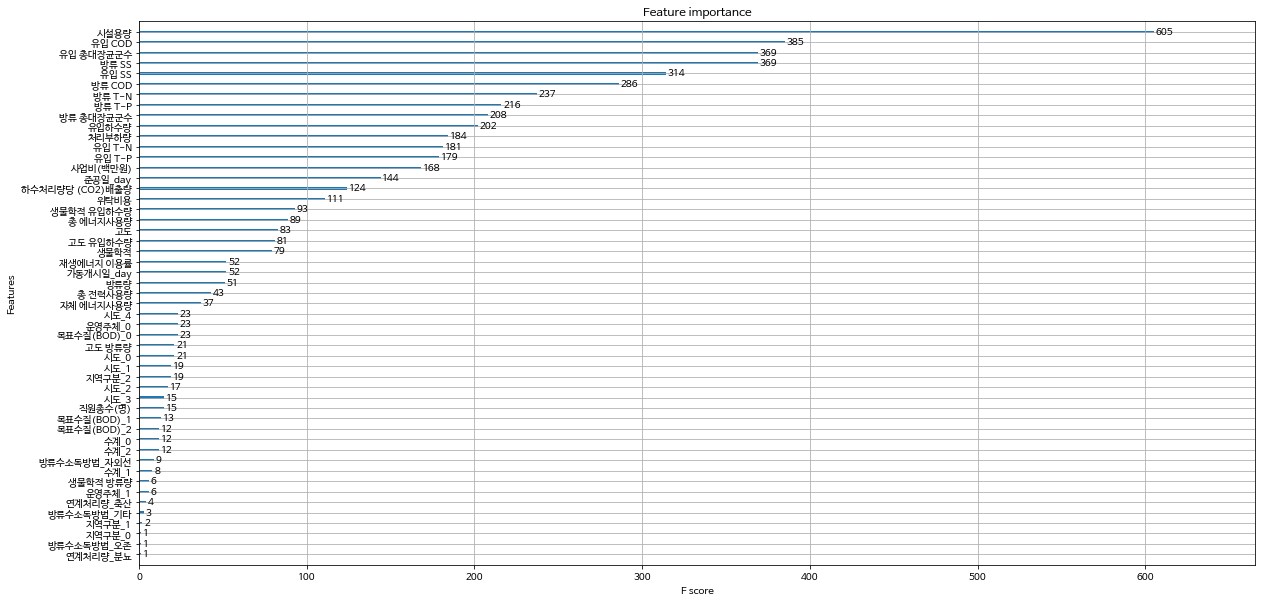

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"] = (20, 10)
#plt.figure(figsize=(50,70))
xgboost.plot_importance(xgb_model)

In [ ]:
predictions = xgb_model.predict(X_test)
predictions

array([ 79.850586,  86.65606 ,  88.14796 ,  88.33255 ,  88.36182 ,
        89.79431 ,  87.61684 ,  95.13027 ,  72.48905 ,  85.06053 ,
        85.44269 ,  84.19213 ,  92.41005 ,  96.24361 ,  90.497215,
        93.266754,  91.63313 ,  90.58719 ,  69.46422 ,  83.04406 ,
        90.17244 ,  79.143486,  92.69303 ,  89.46326 ,  90.527214,
        84.788895,  74.328835,  77.27542 ,  98.294586, 100.29533 ,
        97.33994 ,  97.08164 ,  98.31297 ,  90.944855,  88.17922 ,
        97.70307 ,  95.439964,  98.85348 ,  99.52221 ,  93.80668 ,
        93.188515, 101.378975,  94.914024,  95.71806 ,  98.03405 ,
        99.12417 ,  98.35471 ,  97.27139 ,  97.996574, 100.3142  ,
       100.36975 ,  96.70728 ,  98.65934 , 103.42643 ,  98.96504 ,
        94.11759 ,  95.88716 ,  96.85467 ,  91.98424 ,  96.78052 ,
        98.97603 ,  96.50085 ,  98.82081 ,  94.14047 ,  96.615524,
        94.49878 ,  98.65611 ,  96.9124  ,  98.108795,  95.47221 ,
        94.858574,  96.53579 ,  89.503265,  95.135704,  98.644

shap

[08:04:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


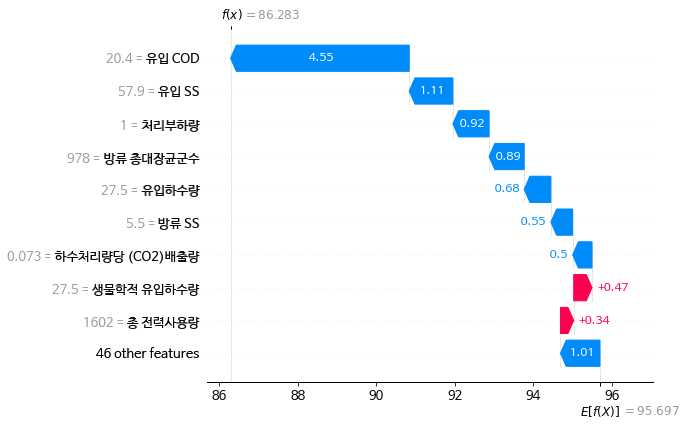

In [ ]:
# train an XGBoost model
#X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, Y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

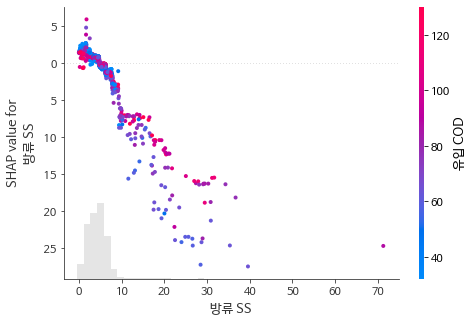

In [ ]:
shap.plots.scatter(shap_values[:,"방류 SS"], color=shap_values)

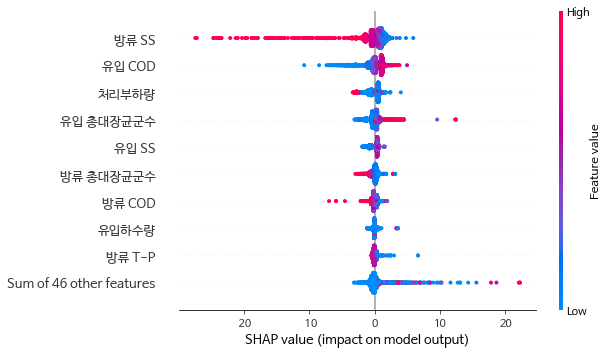

In [ ]:
shap.plots.beeswarm(shap_values)

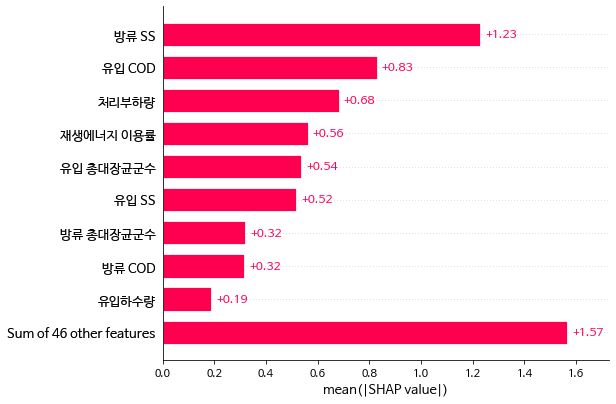

In [ ]:
shap.plots.bar(shap_values)

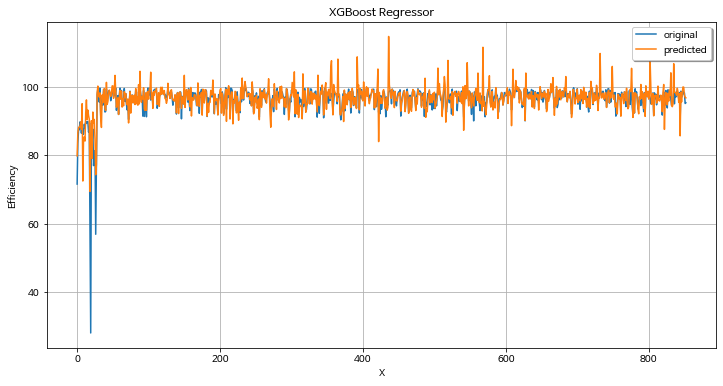

In [ ]:
# visualizing in a plot
x_ax = range(len(Y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, Y_pred, label="predicted")
plt.title("XGBoost Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  